In [1]:
import pandas as pd
dataset = pd.read_csv('Chapter6_PVT Data.csv')
print(dataset.describe())

       Temperature           Rs  Gas Gravity     Oil API          Pbp
count   249.000000   249.000000   249.000000  249.000000   249.000000
mean    147.796271   411.145756     1.012870   31.658760  1424.602150
std      41.936641   291.829082     0.162192    5.036067   908.669973
min      70.447234    27.832416     0.797048   17.854225   131.484967
25%     116.365357   183.034832     0.885612   28.469070   697.772696
50%     142.257643   348.735793     0.978741   32.604282  1252.802615
75%     176.074354   587.055416     1.113760   35.875571  1937.635034
max     282.911419  1471.094081     1.632588   39.714096  4306.643567


In [2]:
x = dataset.iloc[:,0:4]
y = dataset.iloc[:,4].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xnorm = pd.DataFrame(data = sc.fit_transform(x))
yshape = pd.DataFrame(data = y.reshape(-1, 1))
ynorm = pd.DataFrame(data = sc.fit_transform(yshape))

In [3]:
import numpy as np
seed = 50
np.random.seed(seed)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xnorm, ynorm, test_size = 0.3)

from sklearn.neural_network import MLPRegressor
np.random.seed(seed)
clf = MLPRegressor(hidden_layer_sizes =(7), activation = 'tanh', solver = 'lbfgs', alpha = 1, learning_rate_init = 0.1, max_iter = 200, random_state = None, tol = 0.01)
y_train_Ravel = y_train.values.ravel()
clf.fit(x_train, y_train_Ravel)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=7,
             learning_rate_init=0.1, solver='lbfgs', tol=0.01)

In [ ]:
# Cross-validation for Regression

seed = 50
np.random.seed(seed)
y_norm_Ravel = ynorm.values.ravel()

from sklearn.model_selection import cross_val_score
scores_MSE = cross_val_score(clf, xnorm, y_norm_Ravel, cv = 5, scoring = 'neg_mean_squared_error')
print("MSE_ Cross-validaton scores: {}". format(scores_MSE))
print("Average Kfold cross-validation MSE_score:{}". format(scores_MSE.mean()))

scores_R2 = cross_val_score(clf, xnorm, y_norm_Ravel, cv = 5, scoring = 'r2')
print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation socres: {}". format(scores_R2.mean()))

MSE_ Cross-validaton scores: [-0.0055198  -0.00155995 -0.01205835 -0.01779542 -0.00282173]
Average Kfold cross-validation MSE_score:-0.007951048760489016
 R2_Cross-validation scores: [0.93905578 0.7947706  0.94509814 0.63662807 0.89653764]
 Average R2_Cross-validation socres: 0.8424180443306895


In [ ]:
# (GridSearchCV) Grid search with 5-folds cross-validation

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np
seed = 50
np.random.seed(seed)
hyperparameters = [{'hidden_layer_sizes': [2, 3, 4, 5, 6, 7], 'activation': ['relu', 'tanh'], 'solver': ['lbfgs'],
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'batch_size': ['auto'], 'learning_rate': ['constant'],
                    'learning_rate_init': [0.001, 0.01, 0.1, 1], 'max_iter': [500]}]
MLPR = MLPRegressor()
gridsearch = GridSearchCV(MLPR, hyperparameters, cv = 5, verbose = 0)
Best_Model = gridsearch.fit(xnorm, y_norm_Ravel)
print('hidden_layer_sizes:', Best_Model.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', Best_Model.best_estimator_.get_params()['activation'])
print('Best alpha:', Best_Model.best_estimator_.get_params()['alpha'])
print('Best learning_rate_init:', Best_Model.best_estimator_.get_params()['learning_rate_init'])

from sklearn.model_selection import cross_val_score
y_norm_Ravel = ynorm.values.ravel()
scores_R2 = cross_val_score(Best_Model.best_estimator_, xnorm, y_norm_Ravel, cv = 5, scoring = 'r2')
print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation scores: {}". format(scores_R2.mean()))

hidden_layer_sizes: 5
Best activation: tanh
Best alpha: 0.0001
Best learning_rate_init: 0.1
 R2_Cross-validation scores: [0.99235881 0.99299499 0.99641337 0.99494016 0.99181047]
 Average R2_Cross-validation scores: 0.9937035620703082


In [ ]:
# (RandomizedSearchCV) to search wthin a random set of hyperparameter combinations

from sklearn.model_selection import RandomizedSearchCV
import numpy as np
seed = 50
np.random.seed(seed)
hyperparametersR = {'hidden_layer_sizes': [2, 3, 4, 5, 6, 7], 'activation': ['relu', 'tanh'], 'solver': ['lbfgs'],
                    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'batch_size': ['auto'], 'learning_rate': ['constant'],
                    'learning_rate_init': [0.001, 0.01, 0.1, 1], 'max_iter': [200]}
MLPR = MLPRegressor()
from sklearn.neural_network import MLPRegressor
seed = 50
np.random.seed(seed)
gridsearchR = RandomizedSearchCV(MLPR, hyperparametersR, random_state = 1, cv = 5, verbose = 0, n_jobs = -1)
Best_ModelR = gridsearchR.fit(xnorm, y_norm_Ravel)
print('hidden_layer_sizes:', Best_ModelR.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', Best_ModelR.best_estimator_.get_params()['activation'])
print('Best alpha:', Best_ModelR.best_estimator_.get_params()['alpha'])
print('Best learning_rate_init:', Best_ModelR.best_estimator_.get_params()['learning_rate_init'])

from sklearn.model_selection import cross_val_score
scores_R2R = cross_val_score(Best_ModelR.best_estimator_, xnorm, y_norm_Ravel, cv = 5, scoring = 'r2')
print(" R2_Cross-validation scores: {}". format(scores_R2R))
print(" Average R2_Cross-validation scores: {}". format(scores_R2R.mean()))

hidden_layer_sizes: 6
Best activation: tanh
Best alpha: 0.001
Best learning_rate_init: 0.01
 R2_Cross-validation scores: [0.99458316 0.99552713 0.99592353 0.9933157  0.99023985]
 Average R2_Cross-validation scores: 0.9939178719298652


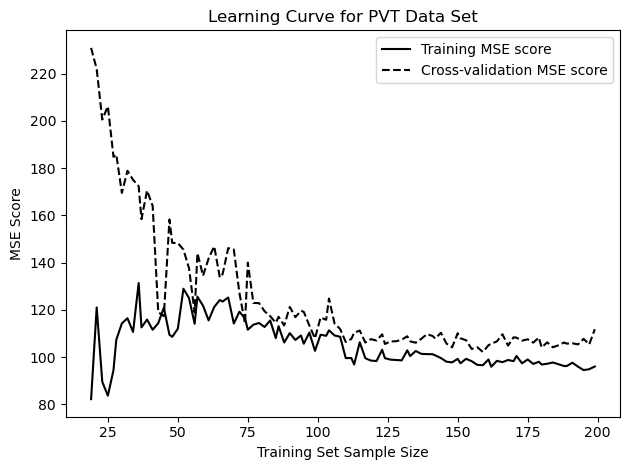

In [9]:
#Learning Curve to evaluate the impact of a training sample size on the model performance.

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

clfB = MLPRegressor(activation = 'relu', alpha = 0.01, hidden_layer_sizes = 7, learning_rate_init = 0.01,
                    max_iter = 500, solver = 'lbfgs', random_state = 20)
train_sample_sizes, train_MSEscores, test_MSEscores = learning_curve(clfB, xnorm, y, cv = 5, scoring = 'neg_mean_absolute_error',
                                                                     n_jobs = -1, train_sizes = np.linspace(0.1, 1.0, 100),
                                                                     random_state = 10)
train_MSEmean = np.mean(train_MSEscores, axis = 1)
test_MSEmean = np.mean(test_MSEscores, axis = 1)

plt.plot(train_sample_sizes, -train_MSEmean, color = "k", label = "Training MSE score")
plt.plot(train_sample_sizes, -test_MSEmean, '--', color = "k", label = "Cross-validation MSE score")
plt.title("Learning Curve for PVT Data Set")
plt.xlabel("Training Set Sample Size"), plt.ylabel("MSE Score"), plt.legend(loc = "best")
plt.tight_layout()
plt.show()